In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg

In [2]:
def convert_rgb_to_gray(im_1):
    m,n,k = im_1.shape
    im_2 = np.zeros((m,n))
    for i in range (m):
        for j in range(n):
            im_2[i,j] = get_distance(im_1[i,j,:])
            
    return im_2


In [3]:
def get_distance(v, w=[1/3, 1/3, 1/3]):
    a, b, c = v[0], v[1], v[2]
    w1, w2, w3 = w[0], w[1], w[2]
    d = ( (a**2)*w1 + (b**2)*w2 + (c**2)*w3 )**.5
    
    return d

In [4]:
def get_default_mask_for_mean():
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9

In [6]:
def apply_mask(part_of_image):
    mask = get_default_mask_for_mean()
    return sum(sum(part_of_image*mask))

(<matplotlib.axes._subplots.AxesSubplot at 0x1a80e458a60>,
 <matplotlib.image.AxesImage at 0x1a810ee0160>)

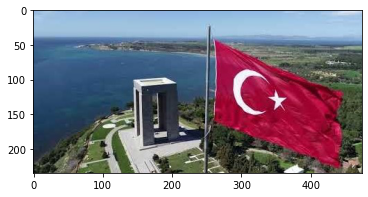

In [9]:
im_1 = plt.imread("canakkale-sehitleri-aniti.jpg")
im_2 = convert_rgb_to_gray(im_1)

%matplotlib inline 
plt.figure(figsize = (20,10))
plt.subplot(1,3,1),plt.imshow(im_1)

In [10]:
def get_median_for_55(poi):
    s_1 = poi.reshape(1,25)
    s_1.sort()
    
    return s_1[0,13]

In [11]:
def get_median(poi):
    s_1 = poi.reshape(1,9)
    s_1.sort()
    
    return s_1[0,4]
    

In [12]:
def get_mean_filter_for_55(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1] 
    im_2 = np.zeros((m,n))
    for i in range(3, m-3):
        for j in range(3, n-3):
            poi = im_1[i-2:i+3,j-2:j+3]
            im_2[i,j] = get_median_for_55(poi)
            
    return im_2
    

In [13]:
def get_mean_filter(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1] 
    im_2 = np.zeros((m,n))
    for i in range(1, m-1):
        for j in range(1, n-1):
            poi = im_1[i-1:i+2,j-1:j+2]
            im_2[i,j] = get_median(poi)
            
    return im_2

In [15]:
im_55 = get_mean_filter_for_55(im_2)

(<matplotlib.axes._subplots.AxesSubplot at 0x1a810fb71c0>,
 <matplotlib.image.AxesImage at 0x1a81100d2e0>)

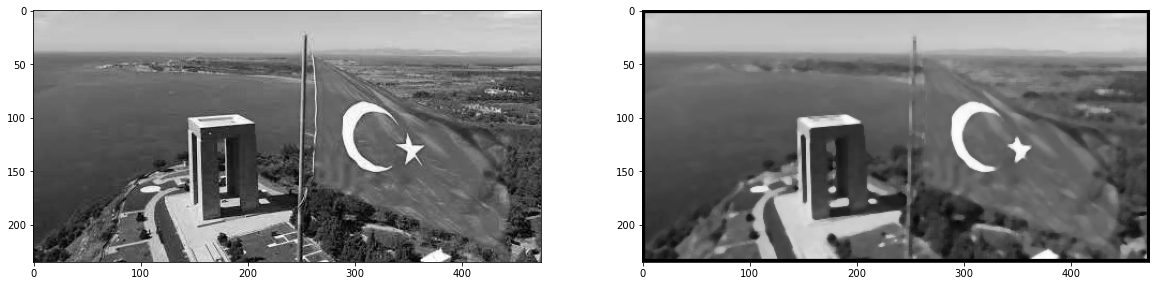

In [18]:
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(im_2, cmap = 'gray')
plt.subplot(1,2,2),plt.imshow(im_55, cmap = 'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x1a810ef8400>,
 <matplotlib.image.AxesImage at 0x1a81106e7c0>)

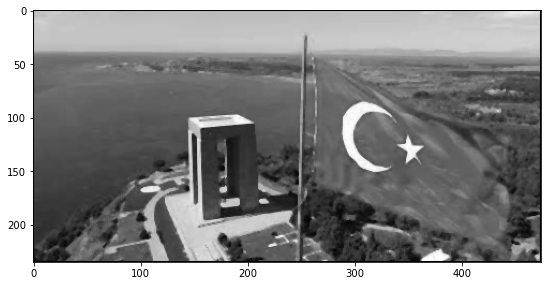

In [19]:
im_555 = get_mean_filter(im_2)
plt.figure(figsize = (20,20))
plt.subplot(1,2,2),plt.imshow(im_555, cmap = 'gray')